In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

from IPython.display import display

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings("ignore")

In [2]:
houses = pd.read_csv("houses_nonan.csv")

In [3]:
houses.isna().sum().sum()

0

In [4]:
houses.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [5]:
# Some numerical features are actually really categories
houses = houses.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [6]:
# Separating numerical features (minus the target) from categorical features
categorical_features = houses.select_dtypes(include = ["object"]).columns
numerical_features = houses.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = houses[numerical_features]
train_cat = houses[categorical_features]

Numerical features : 34
Categorical features : 40


In [7]:
categorical_features

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [8]:
numerical_features

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold'],
      dtype='object')

## <font color=darkblue> Bivariate Analysis

- #### <font color=darkblue> Eliminating insensitive features by obervation (Bird's-eye)


##### Categorical

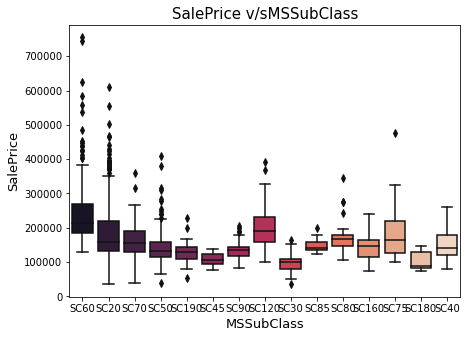

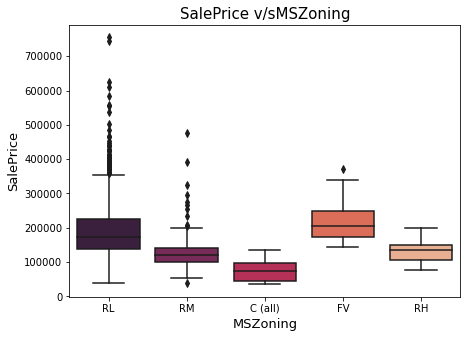

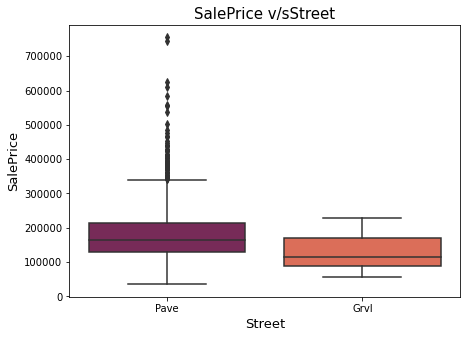

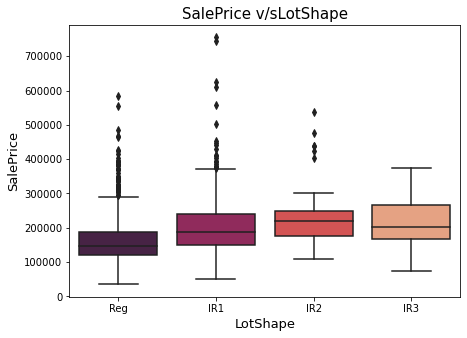

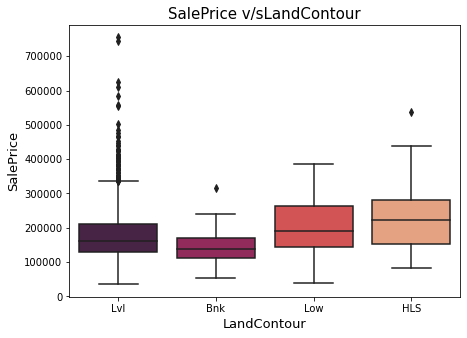

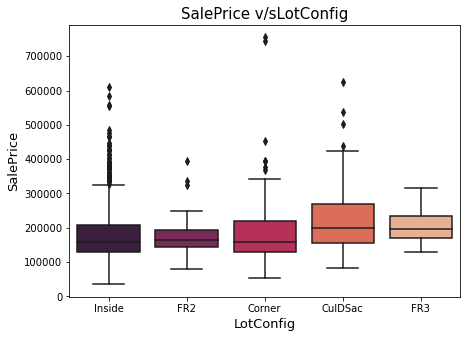

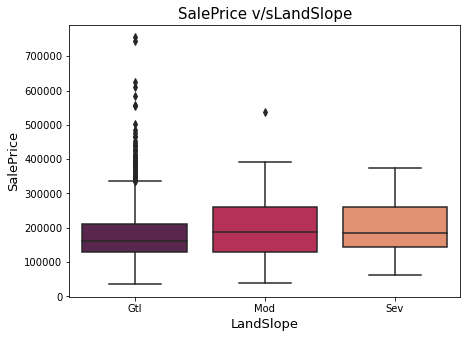

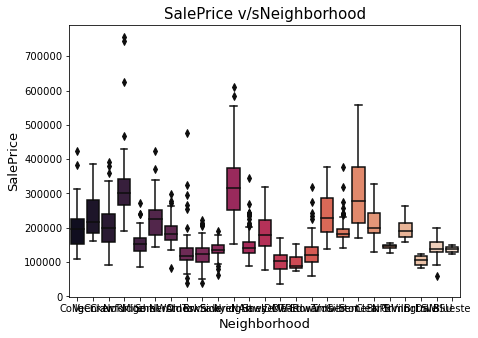

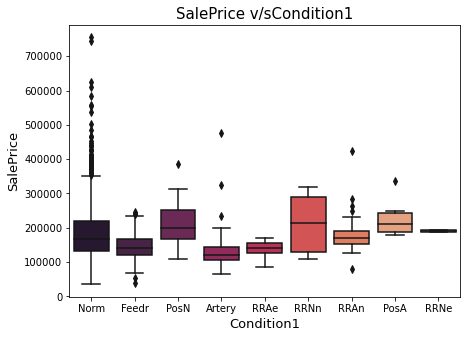

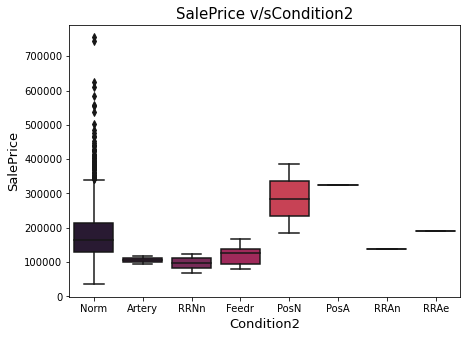

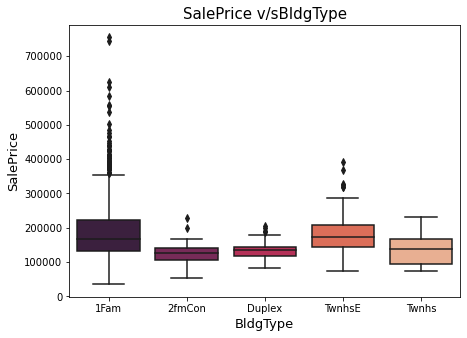

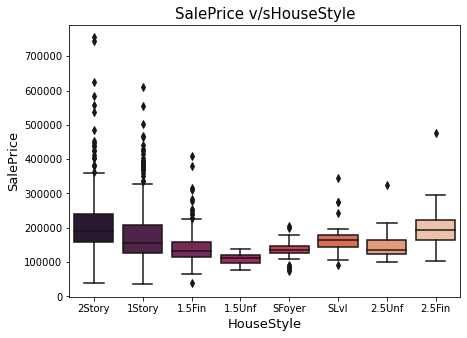

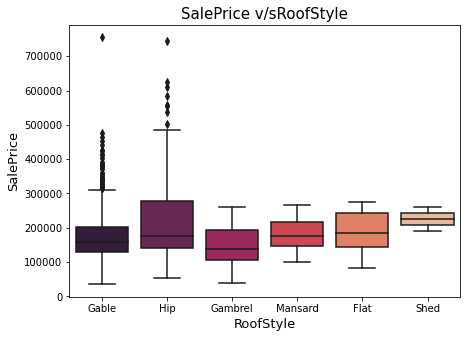

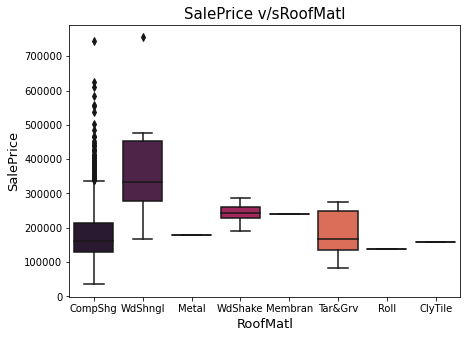

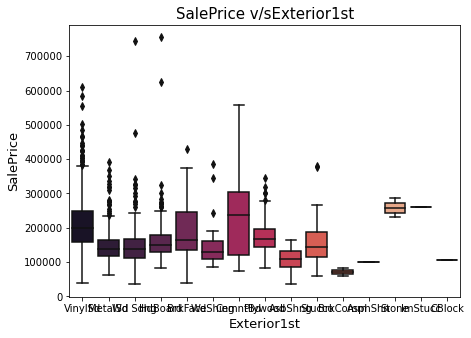

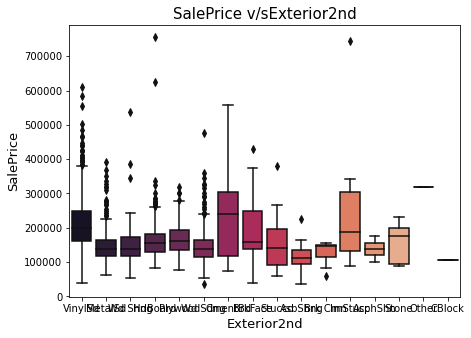

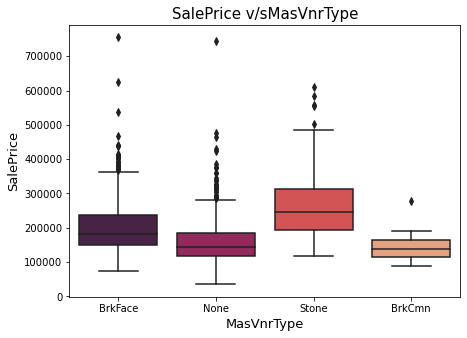

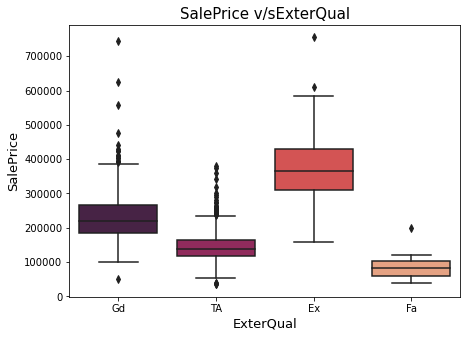

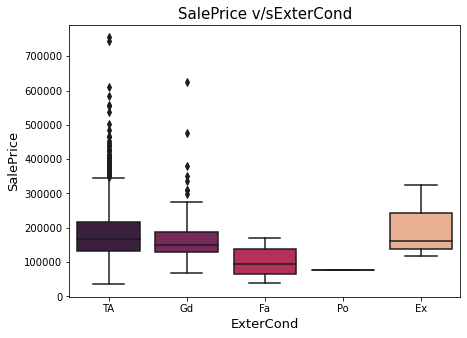

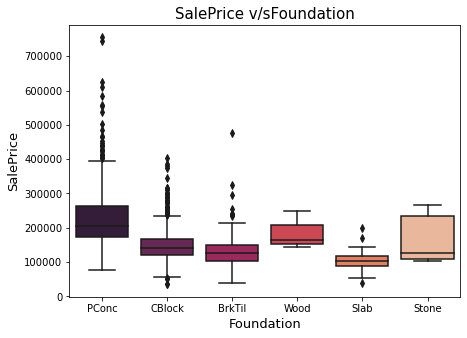

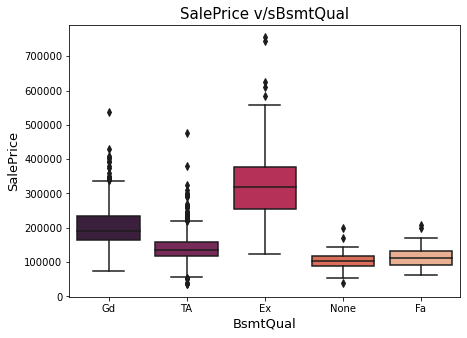

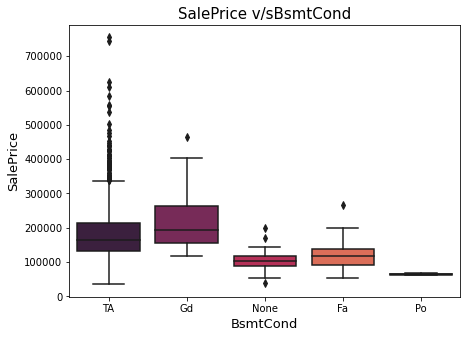

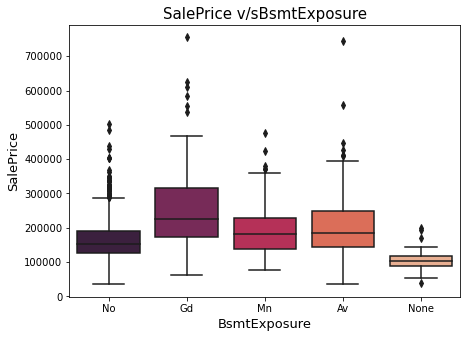

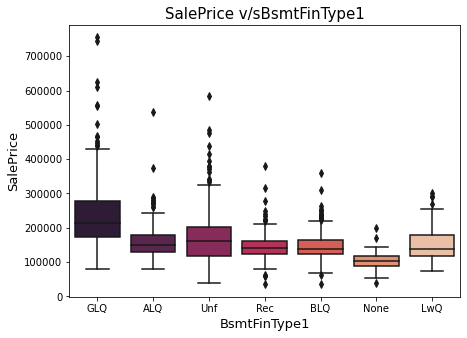

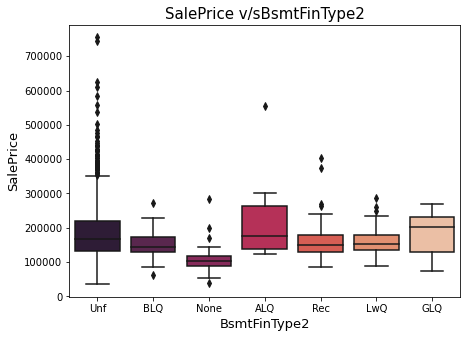

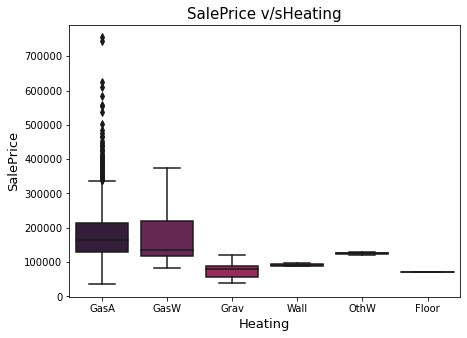

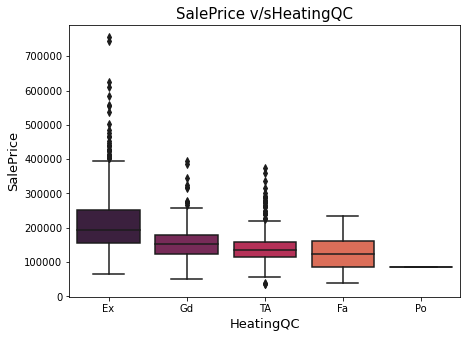

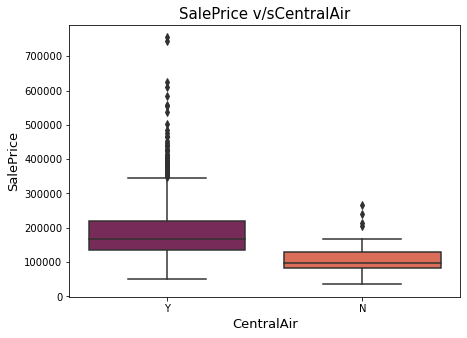

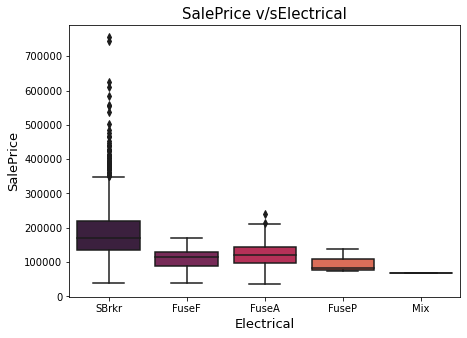

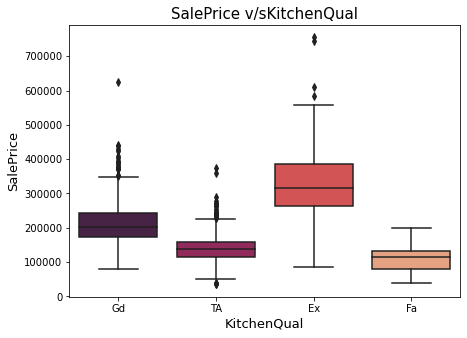

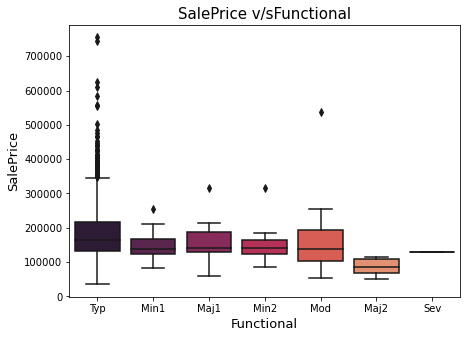

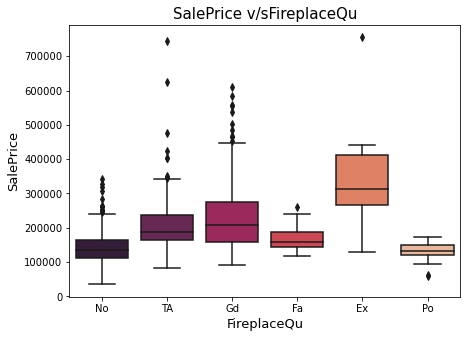

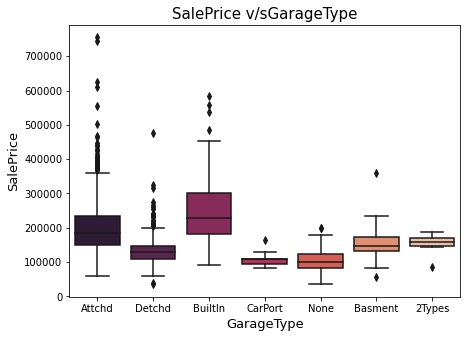

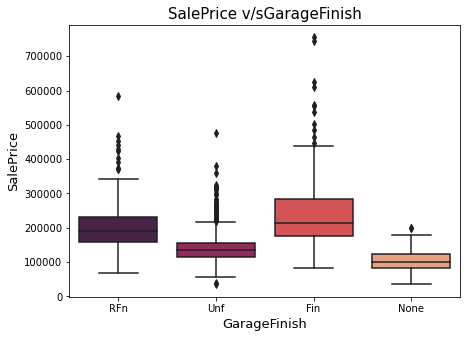

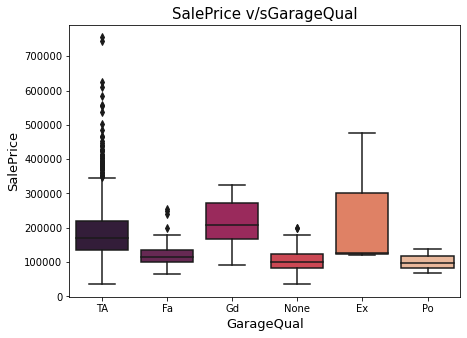

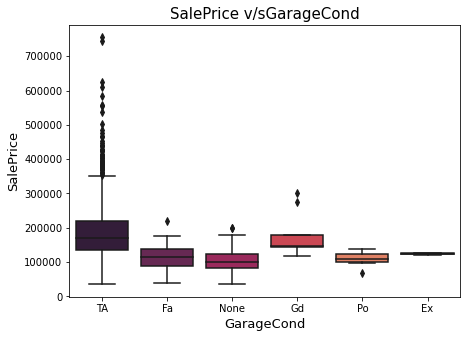

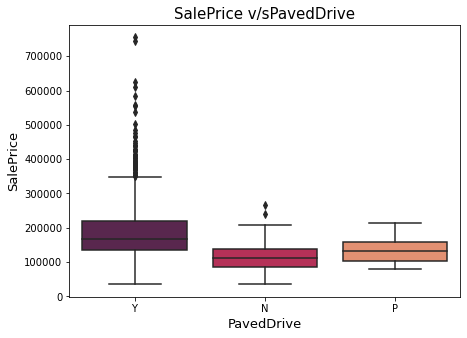

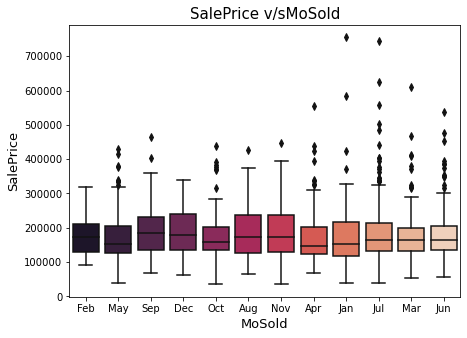

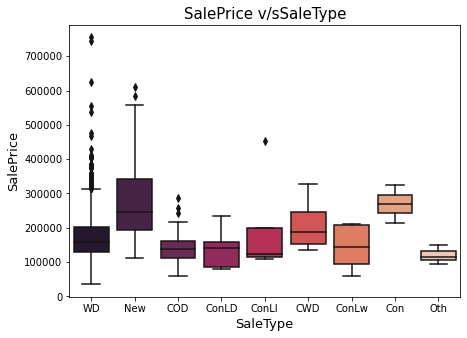

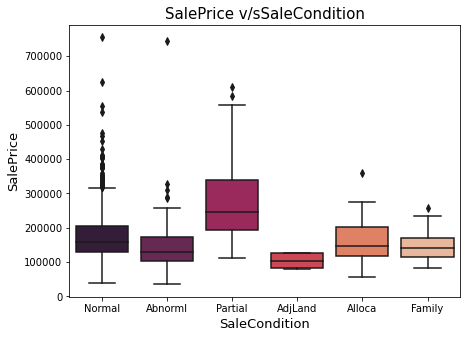

In [9]:
for cat_col in categorical_features:
    plt.figure(figsize=(7,5))
    sns.boxplot(houses[cat_col],houses['SalePrice'], palette='rocket')
    plt.xlabel(cat_col,fontsize=13)
    plt.ylabel('SalePrice',fontsize=13)
    plt.title('SalePrice v/s'+ cat_col,fontsize=15)

##### <font color=darkblue> Inferences:
- Insensitive (or very less sensitive) Features:
    - Street
    - LotShape
    - LandContour
    - LotConfig
    - LandSlope
    - BldgType
    - RoofStyle
    - Exterior2nd
    - MasVnrType
    - ExterCond
    - Foundation
    - BsmtExposure
    - BsmtFinType1
    - BsmtFinType2
    - Heating
    - HeatingQC
    - CentralAir
    - Electrical
    - Fucntional
    - GarageFinish
    - GarageCond
    - PavedDrive
    - MoSold   
    - MSSubCLass
    <br><br>
    
- Features selected for further analysis:
    - MSZoning
    - Neighborhood
    - RoofMatl
    - Exterior1st
    - ExterQual
    - BsmtQual
    - BsmtCond
    - KitchenQual
    - FirePlaceQu
    - GarageType
    - GarageQual
    - SaleType
    - SaleCondition

##### Numerical

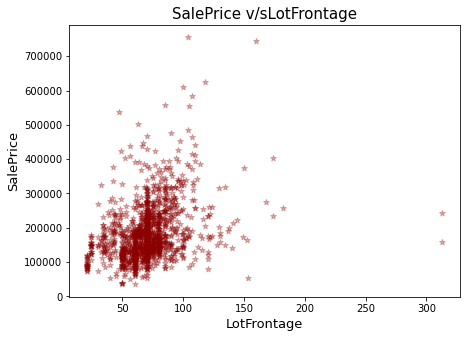

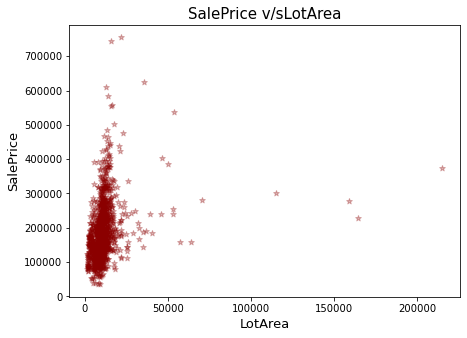

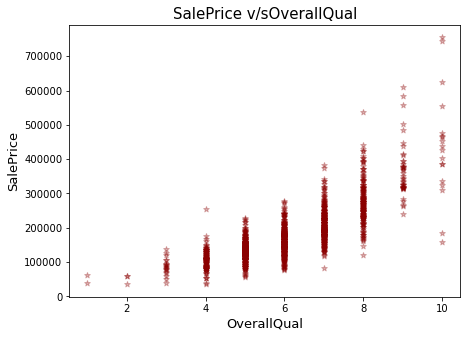

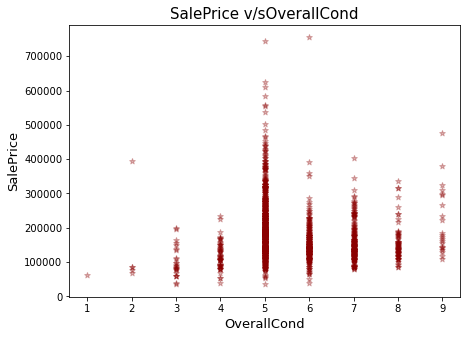

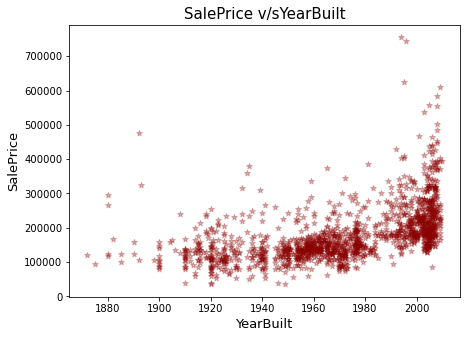

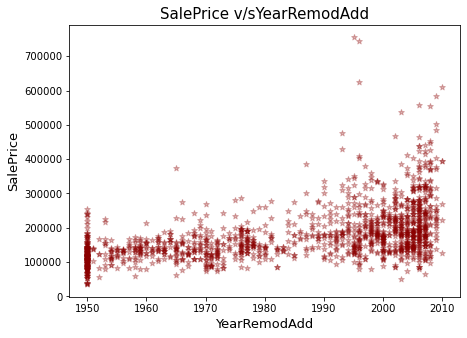

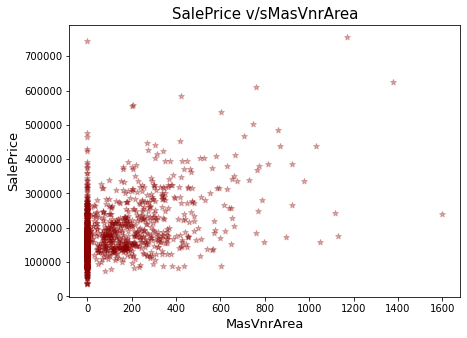

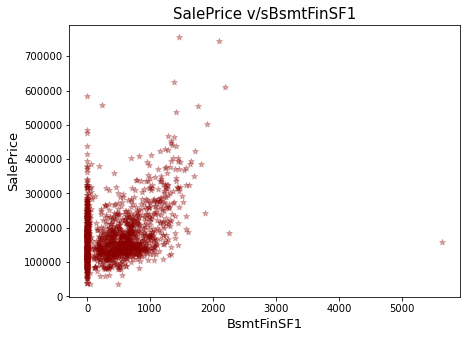

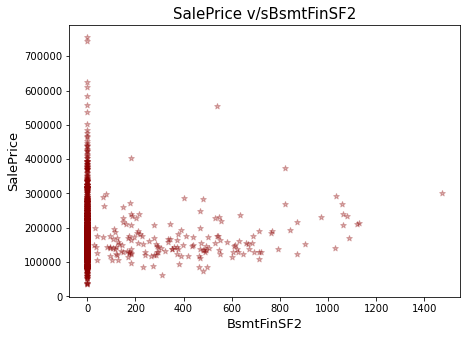

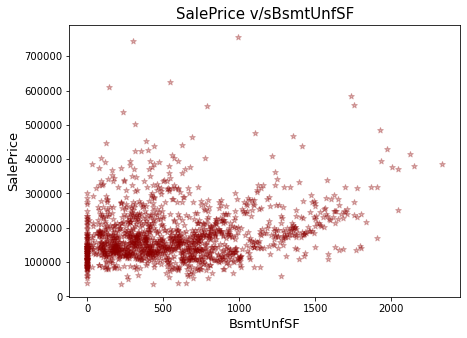

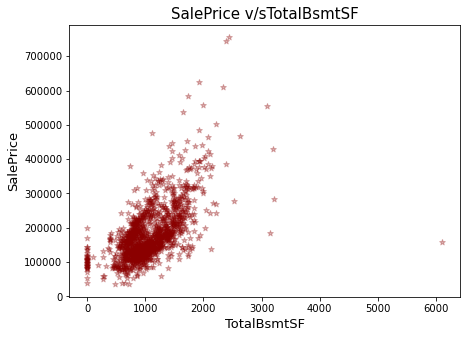

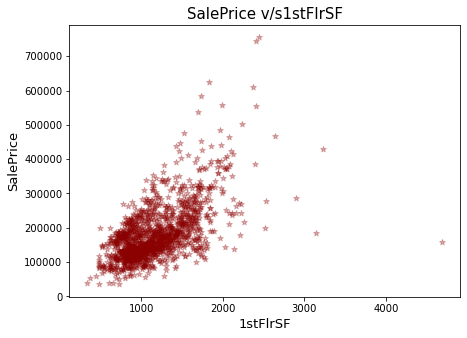

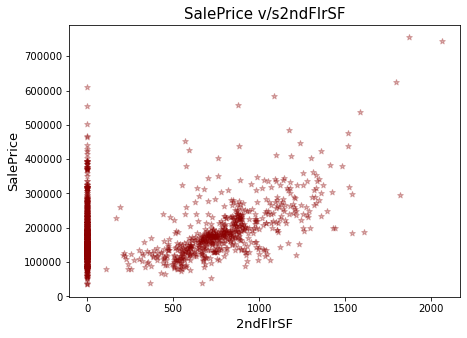

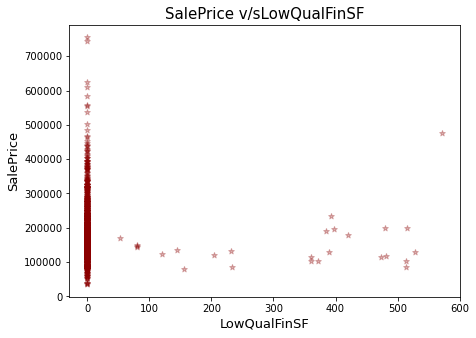

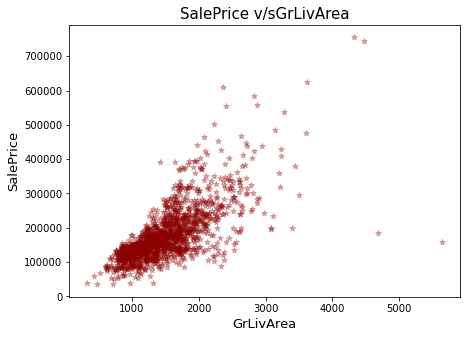

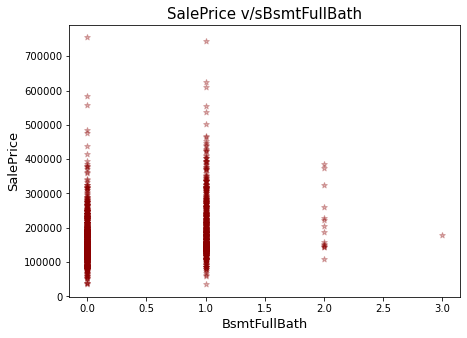

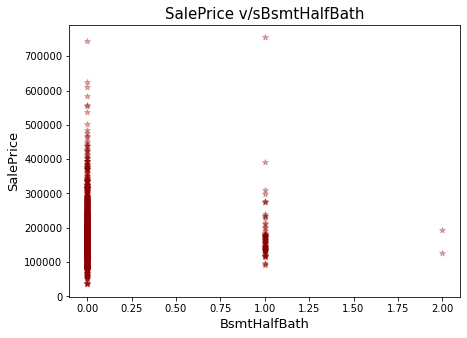

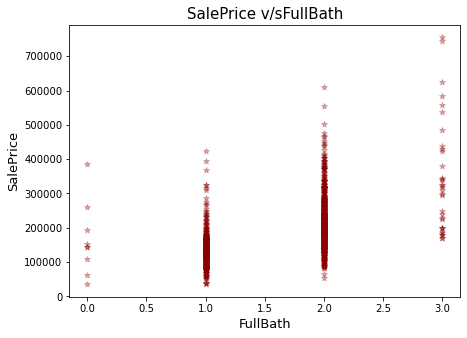

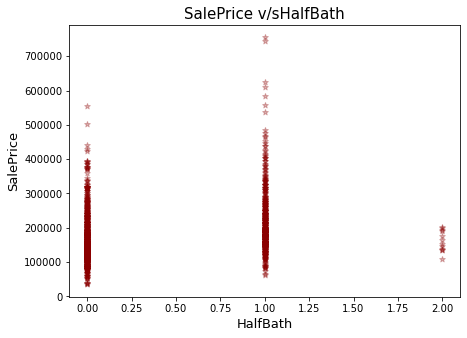

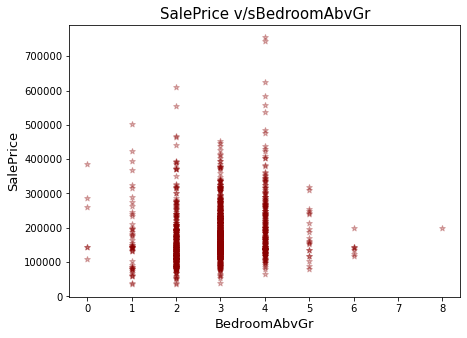

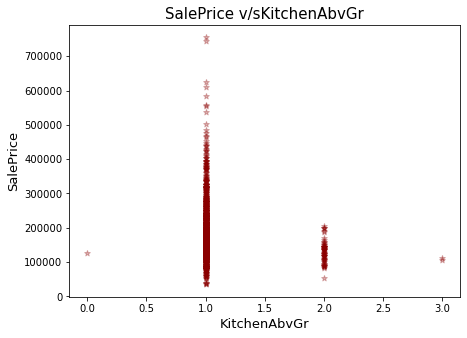

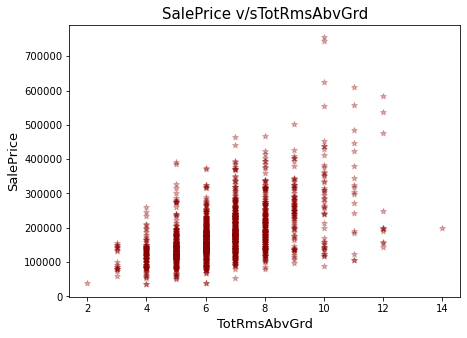

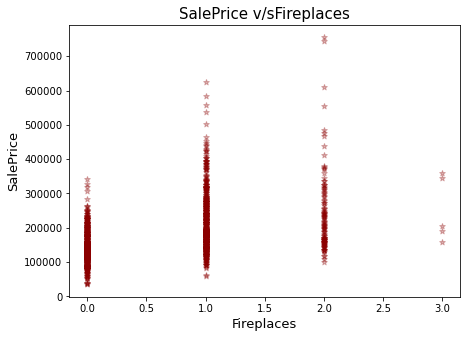

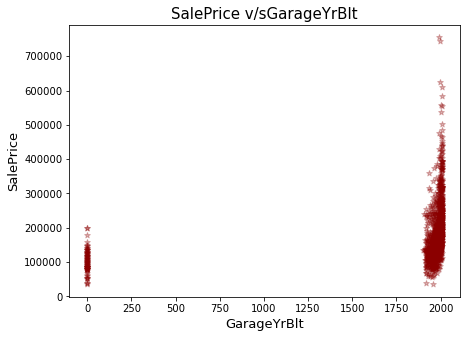

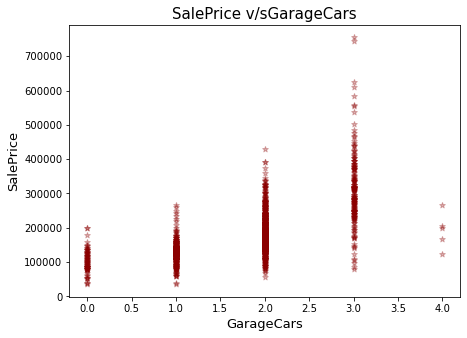

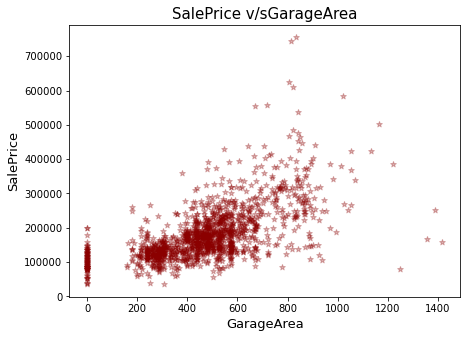

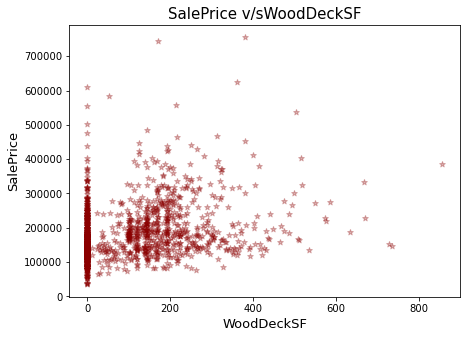

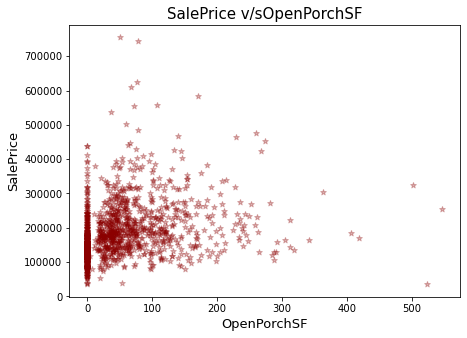

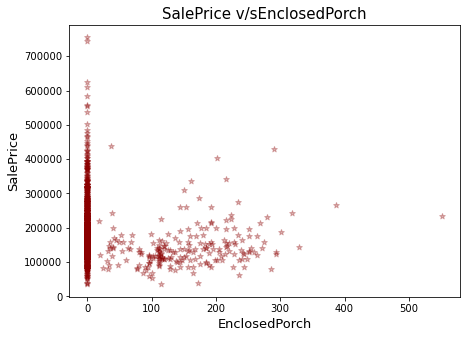

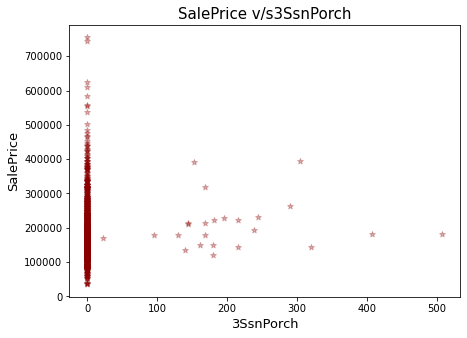

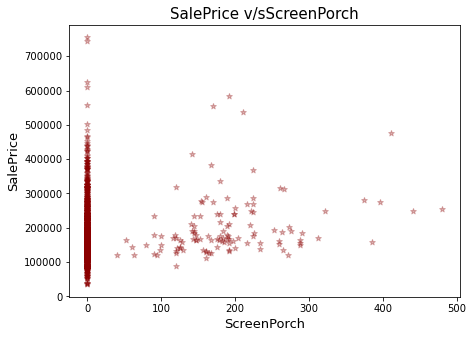

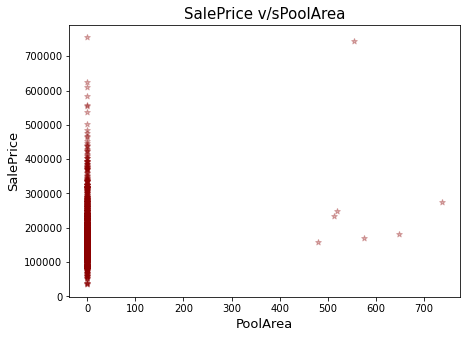

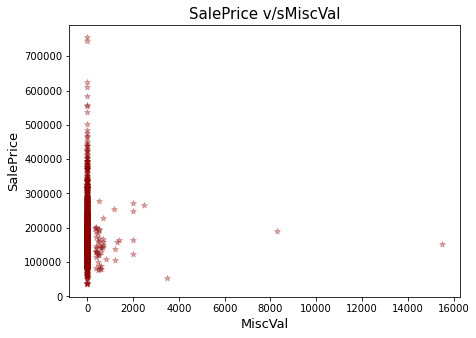

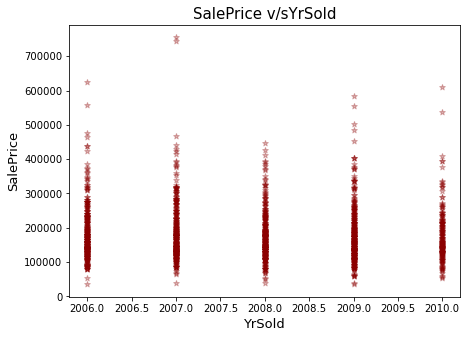

In [10]:
for num_col in numerical_features:
    plt.figure(figsize=(7,5))
    plt.scatter(houses[num_col],houses['SalePrice'], marker="*", color='darkred', alpha=0.3)
    plt.xlabel(num_col,fontsize=13)
    plt.ylabel('SalePrice',fontsize=13)
    plt.title('SalePrice v/s'+ num_col,fontsize=15)

##### <font color=darkblue> Inferences:
- Featues to revisit as they are actually categorical:
    - OverallQual
    - OverallCond
    - BsmtFullBath
    - BsmtHalfBath
    - FullBath
    - HalfBath
    - BedroomAbvGr
    - KitchenAdvGr
    - TotalRmsAbvGrd
    - Fireplaces
    - GarageCars
    - YrSold
    <br><br>
- Features selected for further analysis:
    - TotalBsmtSF
    - YearBuilt
    - YearRemodAdd
    - LotArea
    - LotFrontage
    - GrLivArea
    - 1stFloorSF
    - 2ndFloorSF
    - GarageArea

##### Revisting some numerical features that are actually categorical

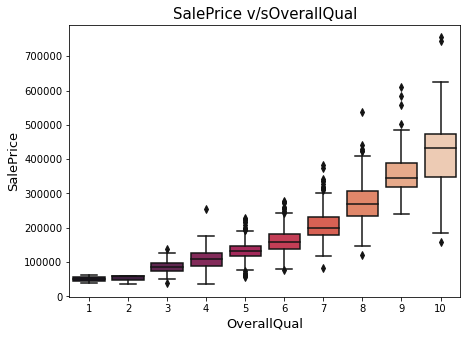

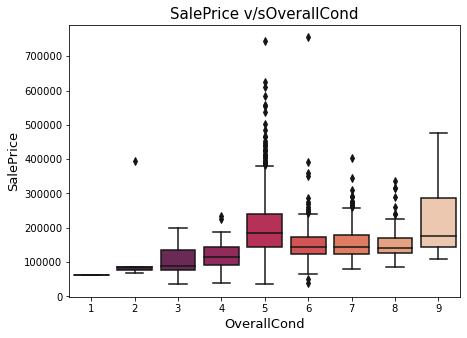

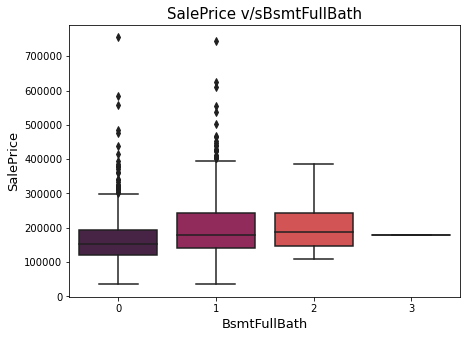

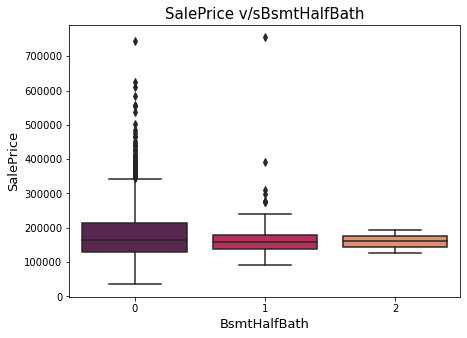

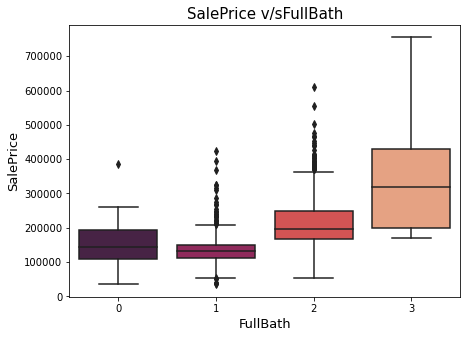

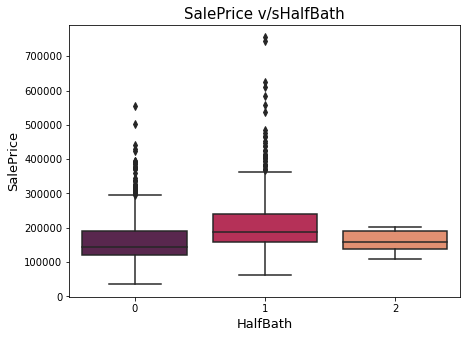

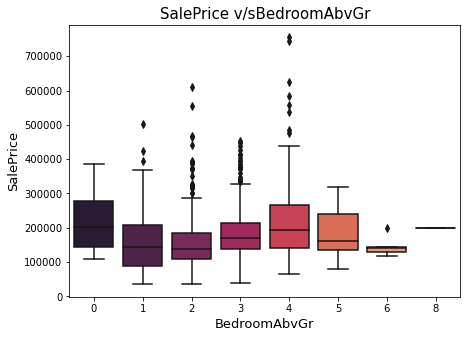

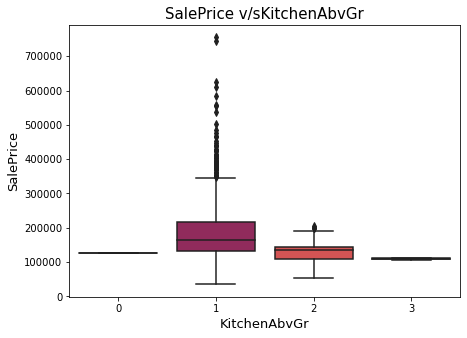

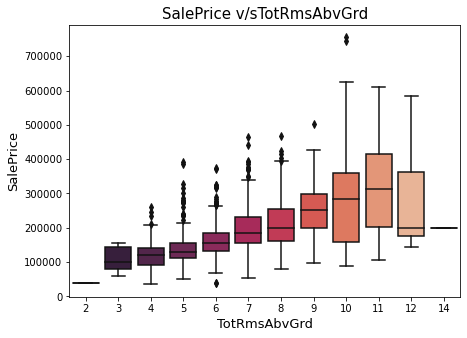

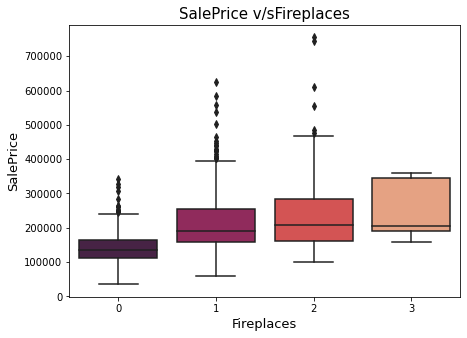

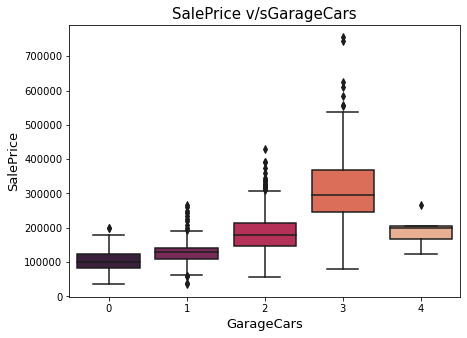

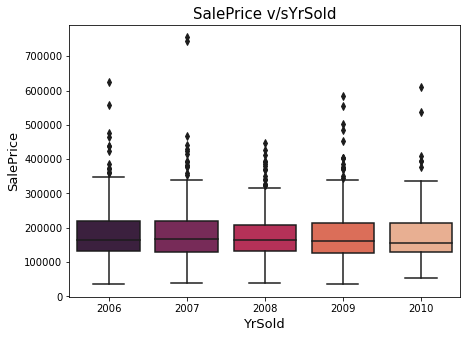

In [11]:
cols= ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
'TotRmsAbvGrd','Fireplaces','GarageCars','YrSold']

for col in cols:
    plt.figure(figsize=(7,5))
    sns.boxplot(houses[col],houses['SalePrice'], palette='rocket')
    plt.xlabel(col,fontsize=13)
    plt.ylabel('SalePrice',fontsize=13)
    plt.title('SalePrice v/s'+ col,fontsize=15)

##### <font color=darkblue> Inferences:

- Features selected for further analysis:
    - OverallQual
    - OverallCond
    - FullBath
    - TotRmsAbvGrd
    - Fireplaces
    - GarageCars

##### <font color=darkred> CHECKPOINT 1:
    So, our EDA tells us that Sales Price shows significant variance with the following features:
        
    Categorical:
    - OverallQual
    - OverallCond
    - FullBath
    - TotRmsAbvGrd
    - Fireplaces
    - GarageCars - Will drop this from analysis as this is directly correlated with GarageArea
    - MSZoning
    - Neighbourhood
    - RoofMatl
    - Exterior1st
    - ExterQual
    - BsmtQual
    - BsmtCond
    - KitchenQual
    - FirePlaceQu
    - GarageType
    - GarageQual
    - SaleType
    - SaleCondition

    
    Numerical:
    - TotalBsmtSF
    - YearBuilt
    - YearRemodAdd
    - LotArea
    - LotFrontage
    - GrLivArea
    - 1stFloorSF
    - 2ndFloorSF
    - GarageArea

### <font color=darkred>In-depth Analysis

##### <font color=darkred> OverallQual v/s Sales Price:

Text(0.5, 1.0, 'SalePrice v/s OverallQual')

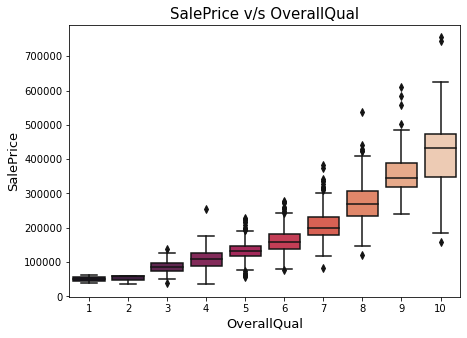

In [12]:
plt.figure(figsize=(7,5))
sns.boxplot(houses['OverallQual'],houses['SalePrice'], palette='rocket')
plt.xlabel('OverallQual',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)
plt.title('SalePrice v/s OverallQual',fontsize=15)

##### <font color=darkblue> Inferences:

- It can be clearly seen that the overall material and finish of the house strongly impacts the sales price.

##### <font color=darkred> OverallCond v/s Sales Price:

Text(0.5, 1.0, 'SalePrice v/s OverallCond')

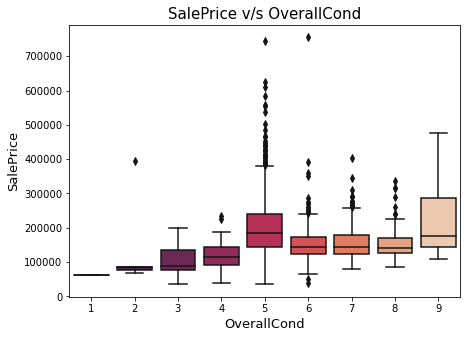

In [13]:
plt.figure(figsize=(7,5))
sns.boxplot(houses['OverallCond'],houses['SalePrice'], palette='rocket')
plt.xlabel('OverallCond',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)
plt.title('SalePrice v/s OverallCond',fontsize=15)

##### <font color=darkblue> Inferences:

- Sales price varies linearly from Overall Condition = 1 upto 5 then is almost constant thereon.

##### <font color=darkred> FullBath v/s Sales Price:


Text(0.5, 1.0, 'SalePrice v/s FullBath')

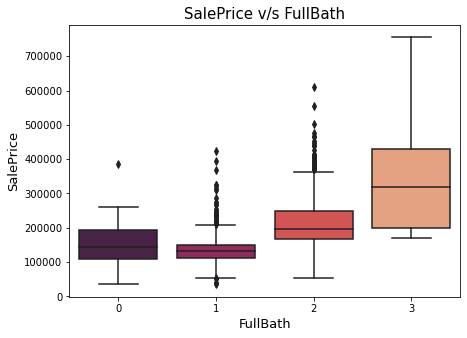

In [14]:
plt.figure(figsize=(7,5))
sns.boxplot(houses['FullBath'],houses['SalePrice'], palette='rocket')
plt.xlabel('FullBath',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)
plt.title('SalePrice v/s FullBath',fontsize=15)

##### <font color=darkblue> Inferences:

- Expensive homes have more full baths. 

##### <font color=darkred> TotRmsAbvGrd v/s Sales Price:


Text(0.5, 1.0, 'SalePrice v/s TotRmsAbvGrd')

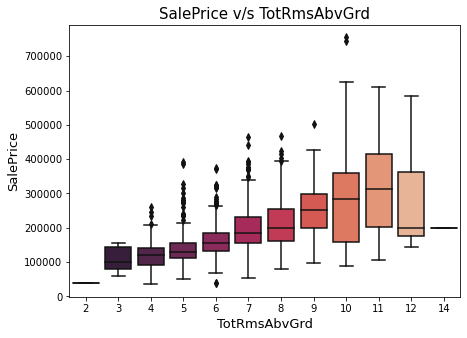

In [15]:
plt.figure(figsize=(7,5))
sns.boxplot(houses['TotRmsAbvGrd'],houses['SalePrice'], palette='rocket')
plt.xlabel('TotRmsAbvGrd',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)
plt.title('SalePrice v/s TotRmsAbvGrd',fontsize=15)

##### <font color=darkblue> Inferences:

- More rooms translates as larger prices, though, more than 11 rooms just seems way too much, hence the median price drop. 

##### <font color=darkred> Fireplaces v/s Sales Price:


Text(0.5, 1.0, 'SalePrice v/s Fireplaces')

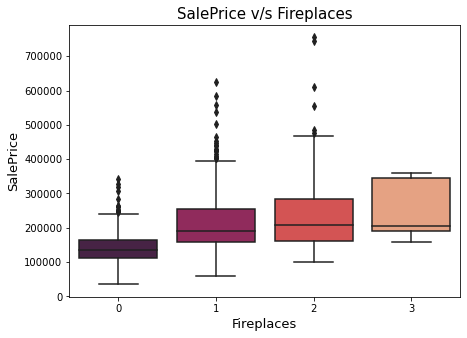

In [16]:
plt.figure(figsize=(7,5))
sns.boxplot(houses['Fireplaces'],houses['SalePrice'], palette='rocket')
plt.xlabel('Fireplaces',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)
plt.title('SalePrice v/s Fireplaces',fontsize=15)

##### <font color=darkblue> Inferences:

- Expensive homes have more fireplaces, nothing unsual here. 

    

##### <font color=darkred> MSZoning v/s Sales Price:


Text(0.5, 1.0, 'SalePrice v/s MSZoning')

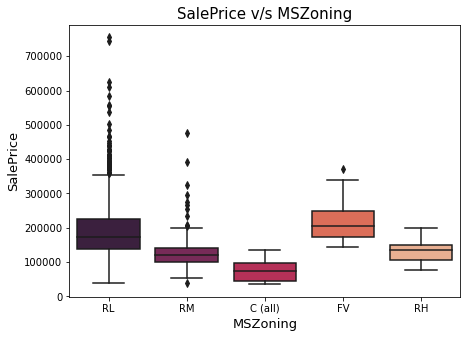

In [17]:
plt.figure(figsize=(7,5))
sns.boxplot(houses['MSZoning'],houses['SalePrice'], palette='rocket')
plt.xlabel('MSZoning',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)
plt.title('SalePrice v/s MSZoning',fontsize=15)

##### <font color=darkblue> Inferences:
- Floating Village(FV) is a special area where a retirement community was developed and has the highest median price.
- Homes in Commercial Areas are comparitively more affordable.

##### <font color=darkred> Neighborhood v/s Sales Price:


Text(0.5, 1.0, 'SalePrice v/s Neighborhood')

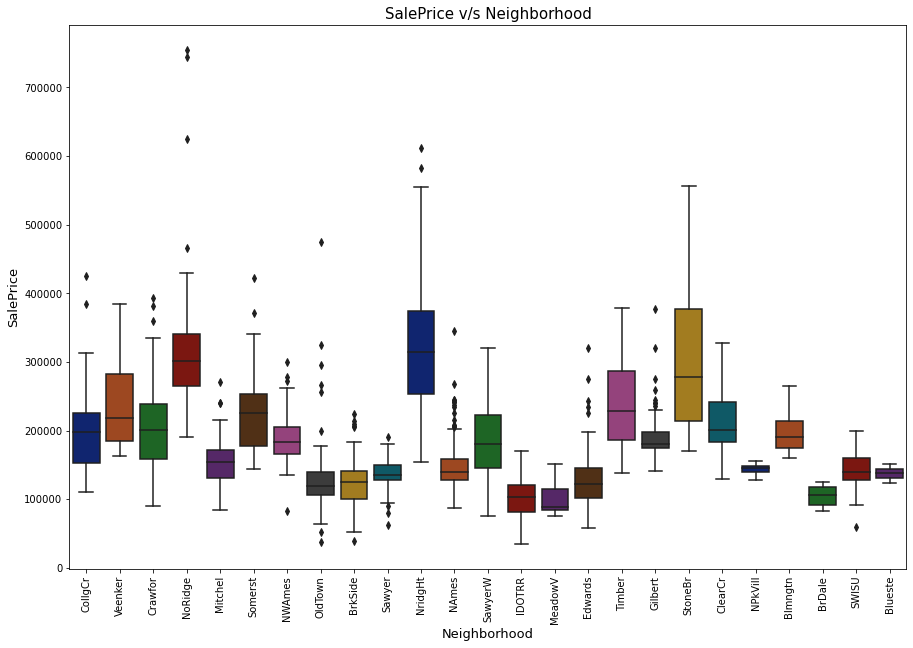

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(houses['Neighborhood'],houses['SalePrice'], palette='dark')
plt.xlabel('Neighborhood',fontsize=13)
plt.xticks(rotation=90)
plt.ylabel('SalePrice',fontsize=13)
plt.title('SalePrice v/s Neighborhood',fontsize=15)

##### <font color=darkblue> Inferences:
- There is a lot of variation observed here in house prices, obviously, neighborhood is a very important aspect of a house purchase.
- Stone Brook, Northridge and Northridge Heights form the top-notch communities whereas Briardale, Brookside & Old Town offer affordable housing.

##### <font color=darkred> RoofMatl v/s Sales Price:


Text(0.5, 1.0, 'SalePrice v/s RoofMatl')

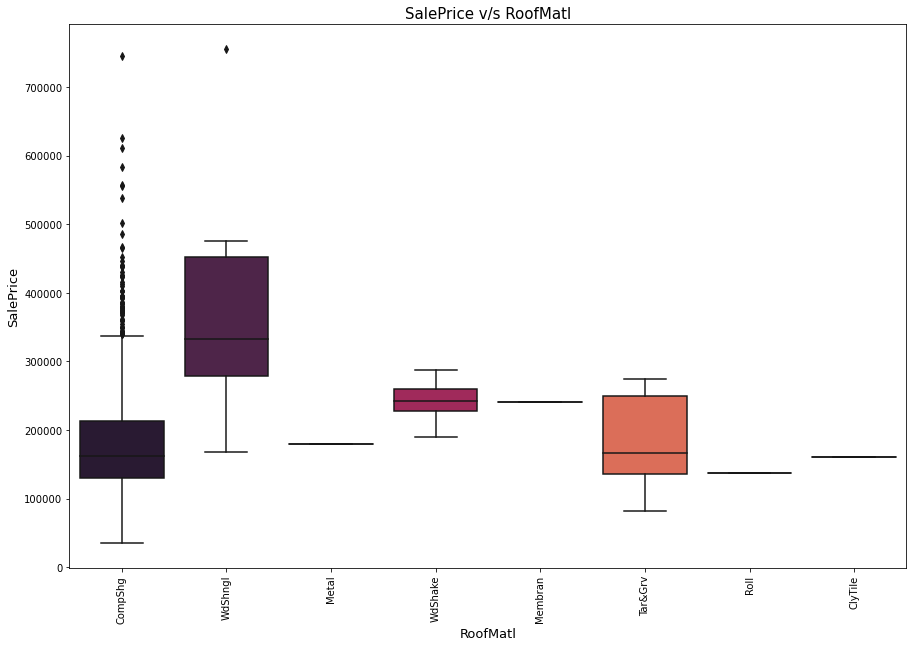

In [19]:
plt.figure(figsize=(15,10))
sns.boxplot(houses['RoofMatl'],houses['SalePrice'], palette='rocket')
plt.xlabel('RoofMatl',fontsize=13)
plt.xticks(rotation=90)
plt.ylabel('SalePrice',fontsize=13)
plt.title('SalePrice v/s RoofMatl',fontsize=15)

##### <font color=darkblue> Inferences:
- Wood Shingles Roofs can only be found in expensive homes.

##### <font color=darkred> Exterior1st v/s Sales Price:


Text(0.5, 1.0, 'SalePrice v/s Exterior1st')

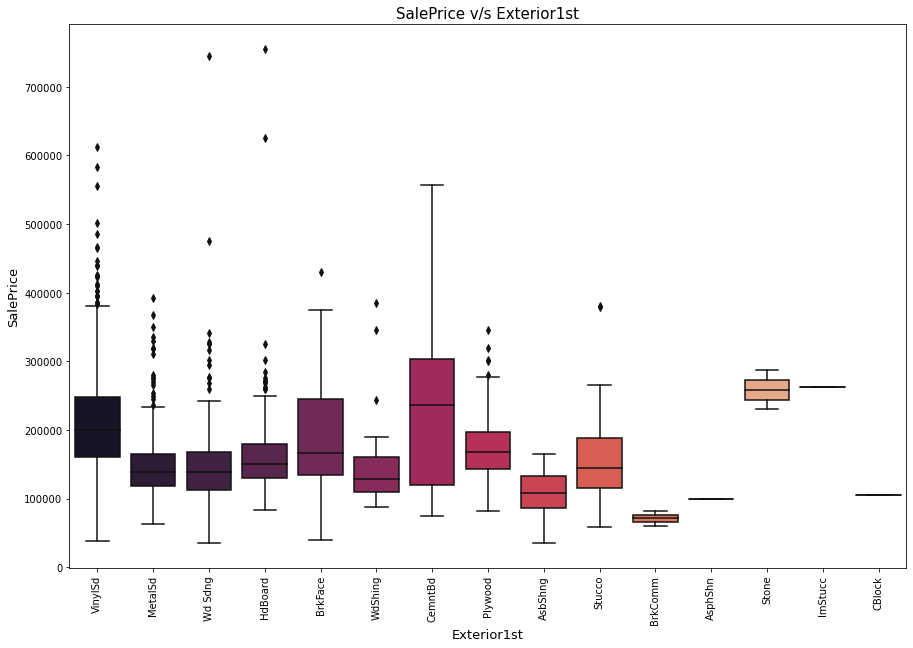

In [20]:
plt.figure(figsize=(15,10))
sns.boxplot(houses['Exterior1st'],houses['SalePrice'], palette='rocket')
plt.xlabel('Exterior1st',fontsize=13)
plt.xticks(rotation=90)
plt.ylabel('SalePrice',fontsize=13)
plt.title('SalePrice v/s Exterior1st',fontsize=15)

##### <font color=darkblue> Inferences:
- Cement Board and Stone covered houses genrally sell at higher prices whereas Common Brick houses sell lower.

##### <font color=darkred> ExterQual v/s Sales Price:


Text(0.5, 1.0, 'SalePrice v/s ExterQual')

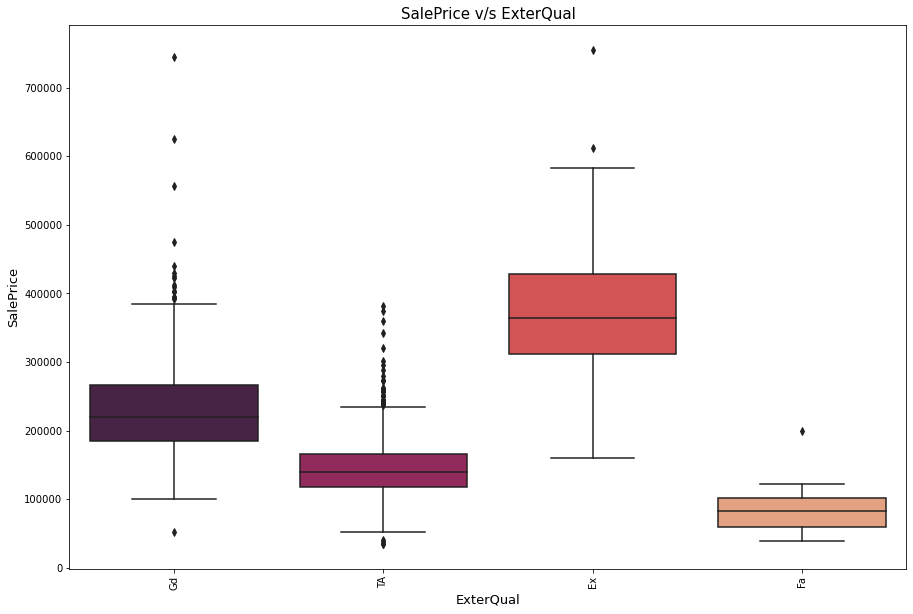

In [21]:
plt.figure(figsize=(15,10))
sns.boxplot(houses['ExterQual'],houses['SalePrice'], palette='rocket')
plt.xlabel('ExterQual',fontsize=13)
plt.xticks(rotation=90)
plt.ylabel('SalePrice',fontsize=13)
plt.title('SalePrice v/s ExterQual',fontsize=15)

##### <font color=darkblue> Inferences:
- The quality of the material on the exterior directly influences houses prices.

##### <font color=darkred> BsmtQual v/s Sales Price:


Text(0.5, 1.0, 'SalePrice v/s BsmtQual')

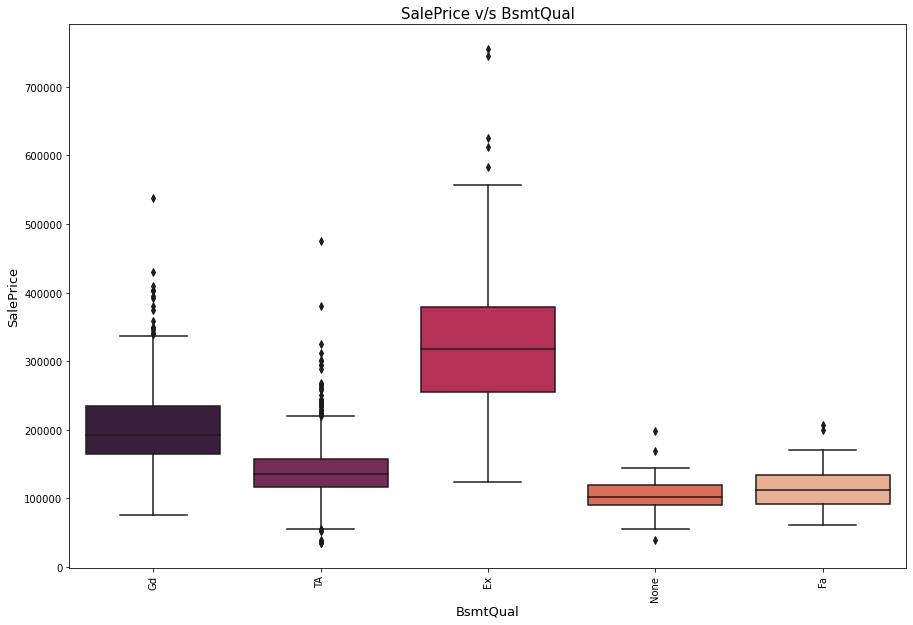

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(houses['BsmtQual'],houses['SalePrice'], palette='rocket')
plt.xlabel('BsmtQual',fontsize=13)
plt.xticks(rotation=90)
plt.ylabel('SalePrice',fontsize=13)
plt.title('SalePrice v/s BsmtQual',fontsize=15)

##### <font color=darkblue> Inferences:
- The height of the basement on the directly influences houses prices.

##### <font color=darkred> BsmtCond v/s Sales Price:


Text(0.5, 1.0, 'SalePrice v/s BsmtCond')

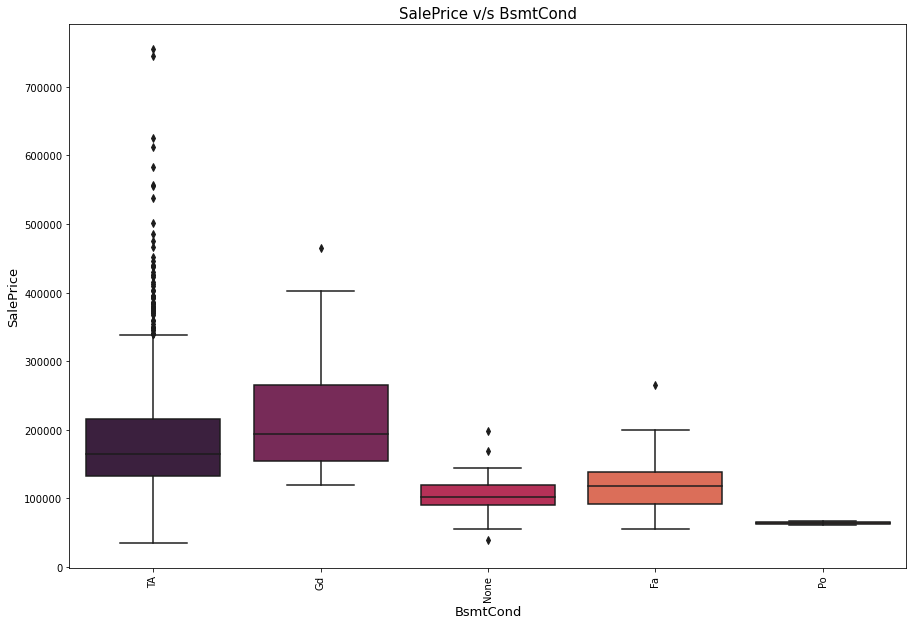

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(houses['BsmtCond'],houses['SalePrice'], palette='rocket')
plt.xlabel('BsmtCond',fontsize=13)
plt.xticks(rotation=90)
plt.ylabel('SalePrice',fontsize=13)
plt.title('SalePrice v/s BsmtCond',fontsize=15)

##### <font color=darkblue> Inferences:
- The general condition of the basement on the directly influences houses prices.

##### <font color=darkred> KitchenQual v/s Sales Price:


Text(0.5, 1.0, 'SalePrice v/s KitchenQual')

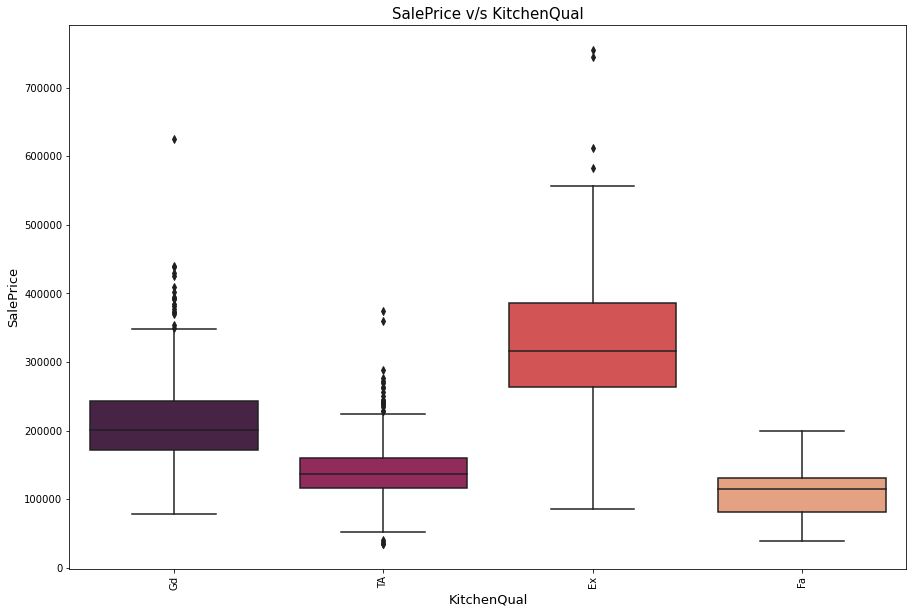

In [24]:
plt.figure(figsize=(15,10))
sns.boxplot(houses['KitchenQual'],houses['SalePrice'], palette='rocket')
plt.xlabel('KitchenQual',fontsize=13)
plt.xticks(rotation=90)
plt.ylabel('SalePrice',fontsize=13)
plt.title('SalePrice v/s KitchenQual',fontsize=15)

##### <font color=darkblue> Inferences:
- The better the kitchen, the more money you've to put in.

##### <font color=darkred> FirePlaceQu v/s Sales Price:


Text(0.5, 1.0, 'SalePrice v/s FireplaceQu')

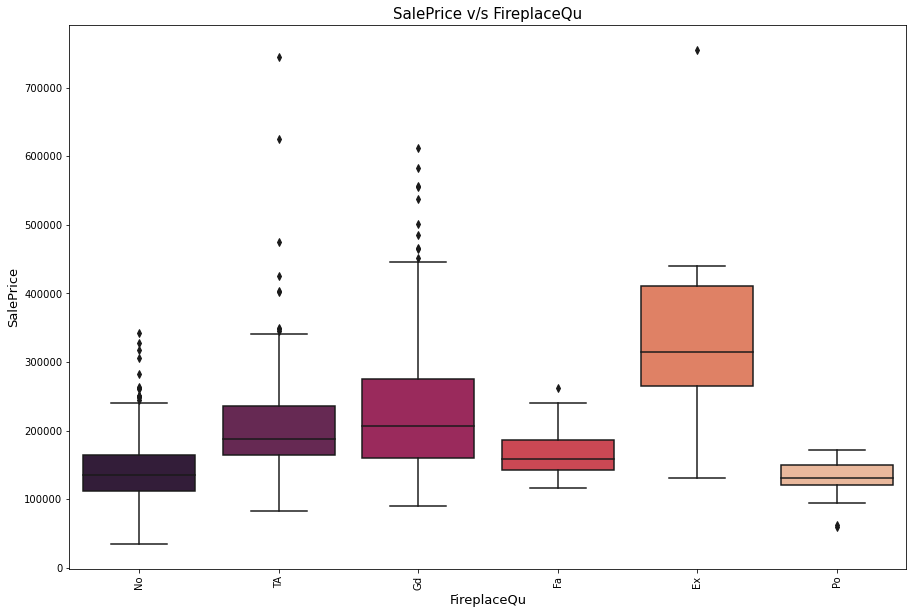

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(houses['FireplaceQu'],houses['SalePrice'], palette='rocket')
plt.xlabel('FireplaceQu',fontsize=13)
plt.xticks(rotation=90)
plt.ylabel('SalePrice',fontsize=13)
plt.title('SalePrice v/s FireplaceQu',fontsize=15)

##### <font color=darkblue> Inferences:
- Excellent fireplaces come at exhorbitant prices.

##### <font color=darkred> GarageType v/s Sales Price:

Text(0.5, 1.0, 'SalePrice v/s GarageType')

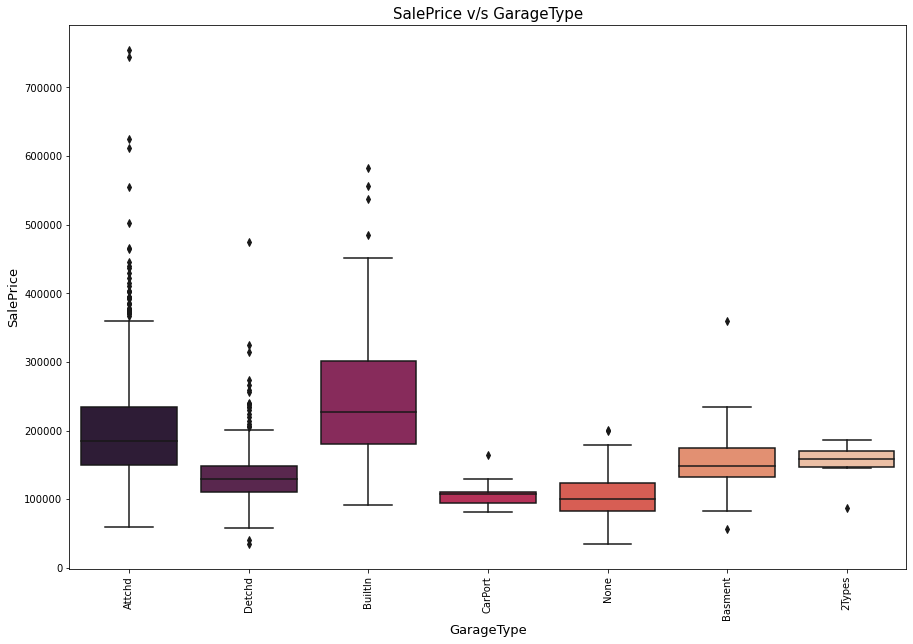

In [26]:
plt.figure(figsize=(15,10))
sns.boxplot(houses['GarageType'],houses['SalePrice'], palette='rocket')
plt.xlabel('GarageType',fontsize=13)
plt.xticks(rotation=90)
plt.ylabel('SalePrice',fontsize=13)
plt.title('SalePrice v/s GarageType',fontsize=15)

##### <font color=darkblue> Inferences:
- Houses with built-in and attached garages sell higher.

##### <font color=darkred> GarageQual v/s Sales Price:

Text(0.5, 1.0, 'SalePrice v/s GarageQual')

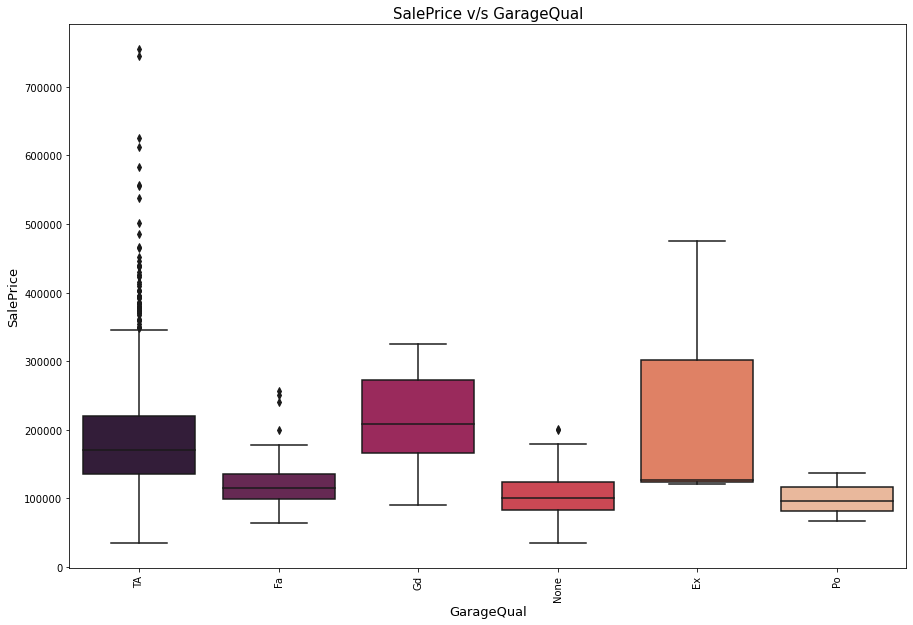

In [27]:
plt.figure(figsize=(15,10))
sns.boxplot(houses['GarageQual'],houses['SalePrice'], palette='rocket')
plt.xlabel('GarageQual',fontsize=13)
plt.xticks(rotation=90)
plt.ylabel('SalePrice',fontsize=13)
plt.title('SalePrice v/s GarageQual',fontsize=15)

##### <font color=darkblue> Inferences:
- Not much deviation observed in house prices based on garage quality.

##### <font color=darkred> SaleType v/s Sales Price:

Text(0.5, 1.0, 'SalePrice v/s SaleType')

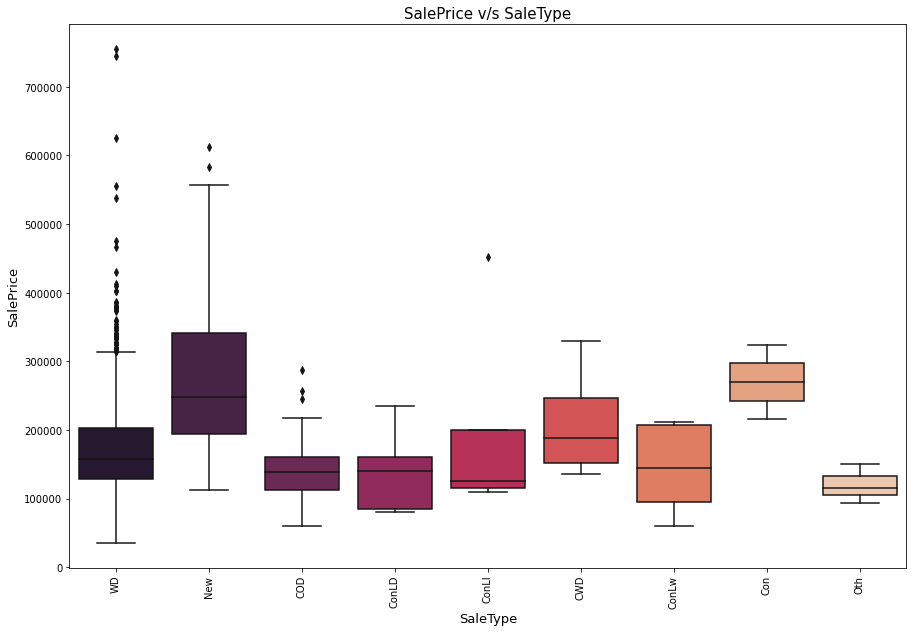

In [28]:
plt.figure(figsize=(15,10))
sns.boxplot(houses['SaleType'],houses['SalePrice'], palette='rocket')
plt.xlabel('SaleType',fontsize=13)
plt.xticks(rotation=90)
plt.ylabel('SalePrice',fontsize=13)
plt.title('SalePrice v/s SaleType',fontsize=15)

##### <font color=darkblue> Inferences:
- Buyers are most likely to buy new and freshly constructed houses at higher prices.

##### <font color=darkred> SaleCondition v/s Sales Price:

Text(0.5, 1.0, 'SalePrice v/s SaleCondition')

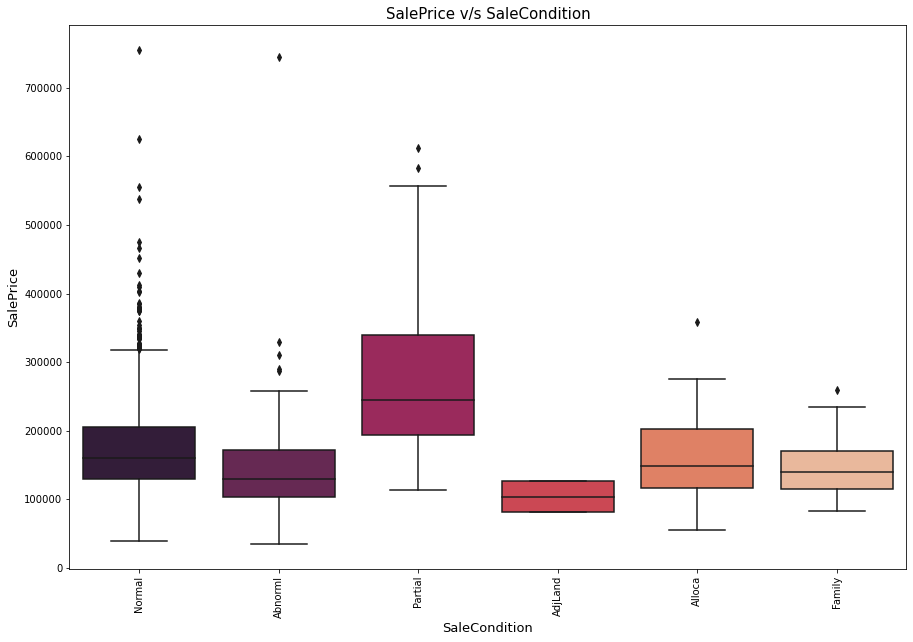

In [29]:
plt.figure(figsize=(15,10))
sns.boxplot(houses['SaleCondition'],houses['SalePrice'], palette='rocket')
plt.xlabel('SaleCondition',fontsize=13)
plt.xticks(rotation=90)
plt.ylabel('SalePrice',fontsize=13)
plt.title('SalePrice v/s SaleCondition',fontsize=15)

##### <font color=darkblue> Inferences:
- Partially constructed and homes in normal condition are more likely to sell at higher prices than those being sold as an Abnormal Sale -  trade, foreclosure, short sale.

#### <font color=darkblue> Numerical Correlations:

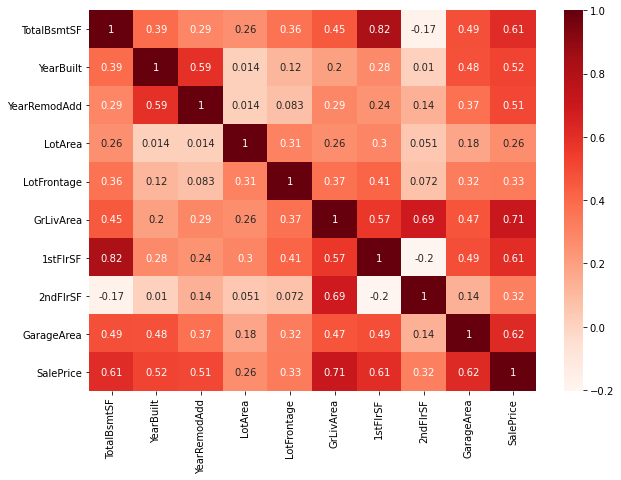

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(houses[['TotalBsmtSF',
    'YearBuilt',
    'YearRemodAdd',
    'LotArea',
    'LotFrontage',
    'GrLivArea',
    '1stFlrSF',
    '2ndFlrSF',
    'GarageArea','SalePrice']].corr(), cmap='Reds', annot=True)

##### <font color=darkblue> Inferences:
- Top numerical features:
    - GrLivArea
    - GarageArea
    - TotalBsmtSF
    - YearBuilt
    - YearRemodAdd

## <font color=darkred> Final EDA Results:
    
Highest Importance:
- OverallQual
- GrLivArea
- Neighbourhood
- GarageArea  
- TotalBsmtSF
- GarageQual
- TotRmsAbvGrd
- ExterQual
- BsmtQual
- BsmtCond
- KitchenQual
- FirePlaceQu



Medium Importance:
- OverallCond
- FullBath
- Fireplaces
- MSZoning
- RoofMatl
- Exterior1st
- GarageType
- SaleType
- SaleCondition
- YearBuilt
- YearRemodAdd
    

    